## Imports 

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 


if not "root" in locals():
    current_path = Path(os.getcwd())
    root = current_path.parent.absolute()

In [2]:
os.chdir(root)
from data_treatment.box_creator import create_binary_box

df = pd.read_csv('database.csv')
df = create_binary_box(df, threshold=2., box_length=7)

### We only keep the selected features 

In [3]:
cols = ["PX_LAST_VIX_volatility",
        "VOLUME_TOTAL_CALL_VIX_volatility",
        "VOLUME_TOTAL_PUT_VIX_volatility",
        "PX_LAST_SPX_volatility",
        "PX_VOLUME_SPX_volatility",
        "PX_LAST_VSTOXX_volatility",
        "Bullish_SENTIMENT",
        "Neutral_SENTIMENT",
        "Bearish_SENTIMENT"]

hand_picked_df = df.set_index("Date")[cols + ["Box"]].dropna(axis = 0)

In [4]:
hand_picked_df.head()

,PX_LAST_VIX_volatility,VOLUME_TOTAL_CALL_VIX_volatility,VOLUME_TOTAL_PUT_VIX_volatility,PX_LAST_SPX_volatility,PX_VOLUME_SPX_volatility,PX_LAST_VSTOXX_volatility,Bullish_SENTIMENT,Neutral_SENTIMENT,Bearish_SENTIMENT,Box
Date,,,,,,,,,,
2006-02-28,12.34,3086.0,5400.0,1280.66,1702255217,15.0449,0.4321,0.2840,0.2840,0
2006-03-01,11.54,1879.0,1252.0,1291.24,1636976645,14.3989,0.4321,0.2840,0.2840,0
2006-03-02,11.72,6747.0,2420.0,1289.14,1670228727,14.9328,0.4094,0.2992,0.2913,0
2006-03-03,11.96,1099.0,23120.0,1287.23,1719897277,15.3114,0.4094,0.2992,0.2913,0
2006-03-06,12.74,4217.0,784.0,1278.26,1567097204,15.1907,0.4094,0.2992,0.2913,0


In [5]:
x = hand_picked_df.drop(columns="Box")
y = hand_picked_df[["Box"]]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [7]:
rc = RidgeClassifier()
rc.fit(X_train, y_train)

score = rc.score(X_train, y_train)
print("Score: ", score)

cv_scores = cross_val_score(rc, 
                            X_train,
                            y_train,
                            cv=10)

def display_scores(scores):
    print("Scores:", cv_scores)
    print( "Mean:", cv_scores.mean())
    print("Standard deviation:", cv_scores.std())
    return 

display_scores(cv_scores)


Score:  0.6739273927392739
Scores: [0.67986799 0.68976898 0.67326733 0.64356436 0.68646865 0.68646865
 0.65346535 0.68646865 0.65676568 0.66666667]
Mean: 0.6722772277227723
Standard deviation: 0.01555362596428802


### Confusion Matrix

In [9]:
y_train_pred= cross_val_predict(rc, X_train, y_train, cv=3)
#returns the prediction made for each fold 

confusion_matrix(y_train, y_train_pred)


array([[1916,   90],
       [ 903,  121]])

1276 were correctly classified as non 'getting out of the box upwards' ('true negatives') \
164 were wrongly classified ('false positives') \
574 were wrongly classified ('false negatives') \
258 were correctly classified ('true positives')

### Getting our precision and recall scores

In [11]:
print(precision_score(y_train, y_train_pred))
print(recall_score(y_train, y_train_pred))

0.6113744075829384
0.31009615384615385


### Getting our F1 score 

In [14]:
print(f1_score(y_train, y_train_pred))

0.4114832535885168


### The ROC Curve (receiver operating characteristic)\
plots the true positive rate against the false positive rate \
ie plots sensitivity versus 1- specificity 

In [27]:

y_scores= rc.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

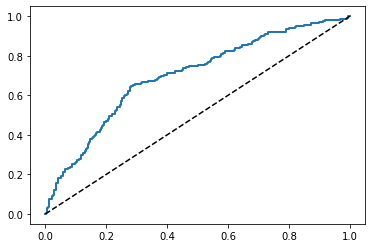

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label= label)
    plt.plot([0,1], [0,1], 'k--') 
    return 

plot_roc_curve(fpr, tpr)
plt.show()

### Area under the curve 

In [32]:
roc_auc_score(y_test, y_scores)

0.698943661971831